In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import torch
from torch.autograd import Variable
import pickle
import seaborn as sns
sns.set_style("whitegrid")


### load EVs

In [2]:
with open ('results/EVs_1HL_4U.txt', 'rb') as fp:
    EVs_4U = pickle.load(fp) #list of #points elements with d entries each, which are the eigenvalues at the point
    
with open ('results/EVs_1HL_8U.txt', 'rb') as fp:
    EVs_8U = pickle.load(fp)
    
    
with open ('results/EVs_1HL_16U.txt', 'rb') as fp:
    EVs_16U = pickle.load(fp)
    
    
with open ('results/EVs_1HL_32U.txt', 'rb') as fp:
    EVs_32U = pickle.load(fp)
    
    
with open ('results/EVs_1HL_64U.txt', 'rb') as fp:
    EVs_64U = pickle.load(fp)
    


compute avg min and max EV

In [3]:
x=0
EVs_4U_min=np.mean([x+entry[0] for entry in EVs_4U])
x=0
EVs_4U_max=np.mean([x+entry[-1] for entry in EVs_4U])

x=0
EVs_8U_min=np.mean([x+entry[0] for entry in EVs_8U])
x=0
EVs_8U_max=np.mean([x+entry[-1] for entry in EVs_8U])

x=0
EVs_16U_min=np.mean([x+entry[0] for entry in EVs_16U])
x=0
EVs_16U_max=np.mean([x+entry[-1] for entry in EVs_16U])

x=0
EVs_32U_min=np.mean([x+entry[0] for entry in EVs_32U])
x=0
EVs_32U_max=np.mean([x+entry[-1] for entry in EVs_32U])

x=0
EVs_64U_min=np.mean([x+entry[0] for entry in EVs_64U])
x=0
EVs_64U_max=np.mean([x+entry[-1] for entry in EVs_64U])


compute avg neg and pos EVs

In [4]:
EVs_4U_neg_avg=0
for i in range(len(EVs_4U)):
    
    EVs_4U_neg_avg+=torch.mean(EVs_4U[i][0:(EVs_4U[i]>=0).nonzero()[0][0]])
    
EVs_8U_neg_avg=0
for i in range(len(EVs_8U)):
    
    EVs_8U_neg_avg+=torch.mean(EVs_8U[i][0:(EVs_8U[i]>=0).nonzero()[0][0]])
    
EVs_16U_neg_avg=0
for i in range(len(EVs_16U)):
    
    EVs_16U_neg_avg+=torch.mean(EVs_16U[i][0:(EVs_16U[i]>=0).nonzero()[0][0]])

EVs_32U_neg_avg=0
for i in range(len(EVs_32U)):
    
    EVs_32U_neg_avg+=torch.mean(EVs_32U[i][0:(EVs_32U[i]>=0).nonzero()[0][0]])

EVs_64U_neg_avg=0
for i in range(len(EVs_64U)):
    
    EVs_64U_neg_avg+=torch.mean(EVs_64U[i][0:(EVs_64U[i]>=0).nonzero()[0][0]])
 
######
EVs_4U_pos_avg=0
for i in range(len(EVs_4U)):
    EVs_4U_pos_avg+=torch.mean(EVs_4U[i][(EVs_4U[i]>0).nonzero()[0][0]:len(EVs_4U[0])])
    
EVs_8U_pos_avg=0
for i in range(len(EVs_8U)):
    
    EVs_8U_pos_avg+=torch.mean(EVs_8U[i][(EVs_8U[i]>0).nonzero()[0][0]:len(EVs_8U[0])])
    
EVs_16U_pos_avg=0
for i in range(len(EVs_16U)):
    
    EVs_16U_pos_avg+=torch.mean(EVs_16U[i][(EVs_16U[i]>0).nonzero()[0][0]:len(EVs_16U[0])])

EVs_32U_pos_avg=0
for i in range(len(EVs_32U)):
    
    EVs_32U_pos_avg+=torch.mean(EVs_32U[i][(EVs_32U[i]>0).nonzero()[0][0]:len(EVs_32U[0])])

EVs_64U_pos_avg=0
for i in range(len(EVs_64U)):
    
    EVs_64U_pos_avg+=torch.mean(EVs_64U[i][(EVs_64U[i]>0).nonzero()[0][0]:len(EVs_64U[0])])


## load covariance data

In [15]:
SGD_cov_POS_4U=torch.load('results/SGD_cov_POS_4U')# list of #points w/neg curvature with #neg EVs entries each
                                                # ,which are the avg correlation of SGD with that EV.
SGD_cov_POS_4U_normalized=torch.load('results/SGD_cov_POS_4U_normalized')
SGD_cov_NEG_4U=torch.load('results/SGD_cov_NEG_4U')
SGD_cov_NEG_4U_normalized=torch.load('results/SGD_cov_NEG_4U_normalized')

SGD_cov_POS_8U=torch.load('results/SGD_cov_POS_8U')
SGD_cov_POS_8U_normalized=torch.load('results/SGD_cov_POS_8U_normalized')
SGD_cov_NEG_8U=torch.load('results/SGD_cov_NEG_8U')
SGD_cov_NEG_8U_normalized=torch.load('results/SGD_cov_NEG_8U_normalized')


SGD_cov_POS_16U=torch.load('results/SGD_cov_POS_16U')
SGD_cov_POS_16U_normalized=torch.load('results/SGD_cov_POS_16U_normalized')
SGD_cov_NEG_16U=torch.load('results/SGD_cov_NEG_16U')
SGD_cov_NEG_16U_normalized=torch.load('results/SGD_cov_NEG_16U_normalized')

SGD_cov_POS_32U=torch.load('results/SGD_cov_POS_32U')
SGD_cov_POS_32U_normalized=torch.load('results/SGD_cov_POS_32U_normalized')
SGD_cov_NEG_32U=torch.load('results/SGD_cov_NEG_32U')
SGD_cov_NEG_32U_normalized=torch.load('results/SGD_cov_NEG_32U_normalized')

SGD_cov_POS_64U=torch.load('results/SGD_cov_POS_64U')
SGD_cov_POS_64U_normalized=torch.load('results/SGD_cov_POS_64U_normalized')
SGD_cov_NEG_64U=torch.load('results/SGD_cov_NEG_64U')
SGD_cov_NEG_64U_normalized=torch.load('results/SGD_cov_NEG_64U_normalized')


uniform_cov_POS_4U=torch.load('results/uniform_cov_POS_4U')
uniform_cov_POS_4U_normalized=torch.load('results/uniform_cov_POS_4U_normalized')
uniform_cov_NEG_4U=torch.load('results/uniform_cov_NEG_4U')
uniform_cov_NEG_4U_normalized=torch.load('results/uniform_cov_NEG_4U_normalized')

uniform_cov_POS_8U=torch.load('results/uniform_cov_POS_8U')
uniform_cov_POS_8U_normalized=torch.load('results/uniform_cov_POS_8U_normalized')
uniform_cov_NEG_8U=torch.load('results/uniform_cov_NEG_8U')
uniform_cov_NEG_8U_normalized=torch.load('results/uniform_cov_NEG_8U_normalized')


uniform_cov_POS_16U=torch.load('results/uniform_cov_POS_16U')
uniform_cov_POS_16U_normalized=torch.load('results/uniform_cov_POS_16U_normalized')
uniform_cov_NEG_16U=torch.load('results/uniform_cov_NEG_16U')
uniform_cov_NEG_16U_normalized=torch.load('results/uniform_cov_NEG_16U_normalized')

uniform_cov_POS_32U=torch.load('results/uniform_cov_POS_32U')
uniform_cov_POS_32U_normalized=torch.load('results/uniform_cov_POS_32U_normalized')
uniform_cov_NEG_32U=torch.load('results/uniform_cov_NEG_32U')
uniform_cov_NEG_32U_normalized=torch.load('results/uniform_cov_NEG_32U_normalized')


uniform_cov_POS_64U=torch.load('results/uniform_cov_POS_64U')
uniform_cov_POS_64U_normalized=torch.load('results/uniform_cov_POS_64U_normalized')
uniform_cov_NEG_64U=torch.load('results/uniform_cov_NEG_64U')
uniform_cov_NEG_64U_normalized=torch.load('results/uniform_cov_NEG_64U_normalized')


In [16]:
SGD_cov_rightEV_4U=0
SGD_cov_rightEV_4U= [SGD_cov_rightEV_4U+entry[-1] for entry in SGD_cov_POS_4U_normalized]

SGD_cov_leftEV_4U=0
SGD_cov_leftEV_4U= [SGD_cov_leftEV_4U+entry[0] for entry in SGD_cov_NEG_4U_normalized]

SGD_cov_rightEV_8U=0
SGD_cov_rightEV_8U= [SGD_cov_rightEV_8U+entry[-1] for entry in SGD_cov_POS_8U_normalized]

SGD_cov_leftEV_8U=0
SGD_cov_leftEV_8U= [SGD_cov_leftEV_8U+entry[0] for entry in SGD_cov_NEG_8U_normalized]

SGD_cov_rightEV_16U=0
SGD_cov_rightEV_16U= [SGD_cov_rightEV_16U+entry[-1] for entry in SGD_cov_POS_16U_normalized]

SGD_cov_leftEV_16U=0
SGD_cov_leftEV_16U= [SGD_cov_leftEV_16U+entry[0] for entry in SGD_cov_NEG_16U_normalized]

SGD_cov_rightEV_32U=0
SGD_cov_rightEV_32U= [SGD_cov_rightEV_32U+entry[-1] for entry in SGD_cov_POS_32U_normalized]

SGD_cov_leftEV_32U=0
SGD_cov_leftEV_32U= [SGD_cov_leftEV_32U+entry[0] for entry in SGD_cov_NEG_32U_normalized]

SGD_cov_rightEV_64U=0
SGD_cov_rightEV_64U= [SGD_cov_rightEV_64U+entry[-1] for entry in SGD_cov_POS_64U_normalized]

SGD_cov_leftEV_64U=0
SGD_cov_leftEV_64U= [SGD_cov_leftEV_64U+entry[0] for entry in SGD_cov_NEG_64U_normalized]

uniform_cov_rightEV_4U=0
uniform_cov_rightEV_4U= [uniform_cov_rightEV_4U+entry[-1] for entry in uniform_cov_POS_4U_normalized]

uniform_cov_leftEV_4U=0
uniform_cov_leftEV_4U= [uniform_cov_leftEV_4U+entry[0] for entry in uniform_cov_NEG_4U_normalized]

uniform_cov_rightEV_8U=0
uniform_cov_rightEV_8U= [uniform_cov_rightEV_8U+entry[-1] for entry in uniform_cov_POS_8U_normalized]

uniform_cov_leftEV_8U=0
uniform_cov_leftEV_8U= [uniform_cov_leftEV_8U+entry[0] for entry in uniform_cov_NEG_8U_normalized]

uniform_cov_rightEV_16U=0
uniform_cov_rightEV_16U= [uniform_cov_rightEV_16U+entry[-1] for entry in uniform_cov_POS_16U_normalized]

uniform_cov_leftEV_16U=0
uniform_cov_leftEV_16U= [uniform_cov_leftEV_16U+entry[0] for entry in uniform_cov_NEG_16U_normalized]

uniform_cov_rightEV_32U=0
uniform_cov_rightEV_32U= [uniform_cov_rightEV_32U+entry[-1] for entry in uniform_cov_POS_32U_normalized]

uniform_cov_leftEV_32U=0
uniform_cov_leftEV_32U= [uniform_cov_leftEV_32U+entry[0] for entry in uniform_cov_NEG_32U_normalized]

uniform_cov_rightEV_64U=0
uniform_cov_rightEV_64U= [uniform_cov_rightEV_64U+entry[-1] for entry in uniform_cov_POS_64U_normalized]

uniform_cov_leftEV_64U=0
uniform_cov_leftEV_64U= [uniform_cov_leftEV_64U+entry[0] for entry in uniform_cov_NEG_64U_normalized]


In [7]:
SGD_cov_POS_4U= [torch.mean(entry) for entry in SGD_cov_POS_4U]
SGD_cov_POS_4U_normalized= [torch.mean(entry) for entry in SGD_cov_POS_4U_normalized]
SGD_cov_NEG_4U= [torch.mean(entry) for entry in SGD_cov_NEG_4U]
SGD_cov_NEG_4U_normalized= [torch.mean(entry) for entry in SGD_cov_NEG_4U_normalized]
SGD_cov_NEG_8U= [torch.mean(entry) for entry in SGD_cov_NEG_8U]
SGD_cov_NEG_8U_normalized= [torch.mean(entry) for entry in SGD_cov_NEG_8U_normalized]
SGD_cov_POS_8U= [torch.mean(entry) for entry in SGD_cov_POS_8U]
SGD_cov_POS_8U_normalized= [torch.mean(entry) for entry in SGD_cov_POS_8U_normalized]
SGD_cov_NEG_16U= [torch.mean(entry) for entry in SGD_cov_NEG_16U]
SGD_cov_NEG_16U_normalized= [torch.mean(entry) for entry in SGD_cov_NEG_16U_normalized]
SGD_cov_POS_16U= [torch.mean(entry) for entry in SGD_cov_POS_16U]
SGD_cov_POS_16U_normalized= [torch.mean(entry) for entry in SGD_cov_POS_16U_normalized]
SGD_cov_NEG_32U= [torch.mean(entry) for entry in SGD_cov_NEG_32U]
SGD_cov_NEG_32U_normalized= [torch.mean(entry) for entry in SGD_cov_NEG_32U_normalized]
SGD_cov_POS_32U= [torch.mean(entry) for entry in SGD_cov_POS_32U]
SGD_cov_POS_32U_normalized= [torch.mean(entry) for entry in SGD_cov_POS_32U_normalized]

SGD_cov_POS_64U= [torch.mean(entry) for entry in SGD_cov_POS_64U]
SGD_cov_POS_64U_normalized= [torch.mean(entry) for entry in SGD_cov_POS_64U_normalized]
SGD_cov_NEG_64U= [torch.mean(entry) for entry in SGD_cov_NEG_64U]
SGD_cov_NEG_64U_normalized= [torch.mean(entry) for entry in SGD_cov_NEG_64U_normalized]

uniform_cov_POS_4U= [torch.mean(entry) for entry in uniform_cov_POS_4U]
uniform_cov_POS_4U_normalized= [torch.mean(entry) for entry in uniform_cov_POS_4U_normalized]
uniform_cov_POS_8U= [torch.mean(entry) for entry in uniform_cov_POS_8U]
uniform_cov_POS_8U_normalized= [torch.mean(entry) for entry in uniform_cov_POS_8U_normalized]
uniform_cov_POS_16U= [torch.mean(entry) for entry in uniform_cov_POS_16U]
uniform_cov_POS_16U_normalized= [torch.mean(entry) for entry in uniform_cov_POS_16U_normalized]
uniform_cov_POS_32U= [torch.mean(entry) for entry in uniform_cov_POS_32U]
uniform_cov_POS_32U_normalized= [torch.mean(entry) for entry in uniform_cov_POS_32U_normalized]
uniform_cov_NEG_4U= [torch.mean(entry) for entry in uniform_cov_NEG_4U]
uniform_cov_NEG_4U_normalized= [torch.mean(entry) for entry in uniform_cov_NEG_4U_normalized]
uniform_cov_NEG_8U= [torch.mean(entry) for entry in uniform_cov_NEG_8U]
uniform_cov_NEG_8U_normalized= [torch.mean(entry) for entry in uniform_cov_NEG_8U_normalized]
uniform_cov_NEG_16U= [torch.mean(entry) for entry in uniform_cov_NEG_16U]
uniform_cov_NEG_16U_normalized= [torch.mean(entry) for entry in uniform_cov_NEG_16U_normalized]
uniform_cov_NEG_32U= [torch.mean(entry) for entry in uniform_cov_NEG_32U]
uniform_cov_NEG_32U_normalized= [torch.mean(entry) for entry in uniform_cov_NEG_32U_normalized]

uniform_cov_POS_64U= [torch.mean(entry) for entry in uniform_cov_POS_64U]
uniform_cov_POS_64U_normalized= [torch.mean(entry) for entry in uniform_cov_POS_64U_normalized]
uniform_cov_NEG_64U= [torch.mean(entry) for entry in uniform_cov_NEG_64U]
uniform_cov_NEG_64U_normalized= [torch.mean(entry) for entry in uniform_cov_NEG_64U_normalized]

In [19]:
SGD_cov_POS_4U= [torch.sum(entry) for entry in SGD_cov_POS_4U]
SGD_cov_POS_4U_normalized= [torch.sum(entry) for entry in SGD_cov_POS_4U_normalized]
SGD_cov_NEG_4U= [torch.sum(entry) for entry in SGD_cov_NEG_4U]
SGD_cov_NEG_4U_normalized= [torch.sum(entry) for entry in SGD_cov_NEG_4U_normalized]
SGD_cov_NEG_8U= [torch.sum(entry) for entry in SGD_cov_NEG_8U]
SGD_cov_NEG_8U_normalized= [torch.sum(entry) for entry in SGD_cov_NEG_8U_normalized]
SGD_cov_POS_8U= [torch.sum(entry) for entry in SGD_cov_POS_8U]
SGD_cov_POS_8U_normalized= [torch.sum(entry) for entry in SGD_cov_POS_8U_normalized]
SGD_cov_NEG_16U= [torch.sum(entry) for entry in SGD_cov_NEG_16U]
SGD_cov_NEG_16U_normalized= [torch.sum(entry) for entry in SGD_cov_NEG_16U_normalized]
SGD_cov_POS_16U= [torch.sum(entry) for entry in SGD_cov_POS_16U]
SGD_cov_POS_16U_normalized= [torch.sum(entry) for entry in SGD_cov_POS_16U_normalized]
SGD_cov_NEG_32U= [torch.sum(entry) for entry in SGD_cov_NEG_32U]
SGD_cov_NEG_32U_normalized= [torch.sum(entry) for entry in SGD_cov_NEG_32U_normalized]
SGD_cov_POS_32U= [torch.sum(entry) for entry in SGD_cov_POS_32U]
SGD_cov_POS_32U_normalized= [torch.sum(entry) for entry in SGD_cov_POS_32U_normalized]

SGD_cov_POS_64U= [torch.sum(entry) for entry in SGD_cov_POS_64U]
SGD_cov_POS_64U_normalized= [torch.sum(entry) for entry in SGD_cov_POS_64U_normalized]
SGD_cov_NEG_64U= [torch.sum(entry) for entry in SGD_cov_NEG_64U]
SGD_cov_NEG_64U_normalized= [torch.sum(entry) for entry in SGD_cov_NEG_64U_normalized]

uniform_cov_POS_4U= [torch.sum(entry) for entry in uniform_cov_POS_4U]
uniform_cov_POS_4U_normalized= [torch.sum(entry) for entry in uniform_cov_POS_4U_normalized]
uniform_cov_POS_8U= [torch.sum(entry) for entry in uniform_cov_POS_8U]
uniform_cov_POS_8U_normalized= [torch.sum(entry) for entry in uniform_cov_POS_8U_normalized]
uniform_cov_POS_16U= [torch.sum(entry) for entry in uniform_cov_POS_16U]
uniform_cov_POS_16U_normalized= [torch.sum(entry) for entry in uniform_cov_POS_16U_normalized]
uniform_cov_POS_32U= [torch.sum(entry) for entry in uniform_cov_POS_32U]
uniform_cov_POS_32U_normalized= [torch.sum(entry) for entry in uniform_cov_POS_32U_normalized]
uniform_cov_NEG_4U= [torch.sum(entry) for entry in uniform_cov_NEG_4U]
uniform_cov_NEG_4U_normalized= [torch.sum(entry) for entry in uniform_cov_NEG_4U_normalized]
uniform_cov_NEG_8U= [torch.sum(entry) for entry in uniform_cov_NEG_8U]
uniform_cov_NEG_8U_normalized= [torch.sum(entry) for entry in uniform_cov_NEG_8U_normalized]
uniform_cov_NEG_16U= [torch.sum(entry) for entry in uniform_cov_NEG_16U]
uniform_cov_NEG_16U_normalized= [torch.sum(entry) for entry in uniform_cov_NEG_16U_normalized]
uniform_cov_NEG_32U= [torch.sum(entry) for entry in uniform_cov_NEG_32U]
uniform_cov_NEG_32U_normalized= [torch.sum(entry) for entry in uniform_cov_NEG_32U_normalized]

uniform_cov_POS_64U= [torch.sum(entry) for entry in uniform_cov_POS_64U]
uniform_cov_POS_64U_normalized= [torch.sum(entry) for entry in uniform_cov_POS_64U_normalized]
uniform_cov_NEG_64U= [torch.sum(entry) for entry in uniform_cov_NEG_64U]
uniform_cov_NEG_64U_normalized= [torch.sum(entry) for entry in uniform_cov_NEG_64U_normalized]

### negative eigenspace correlations

SGD MAXMIN

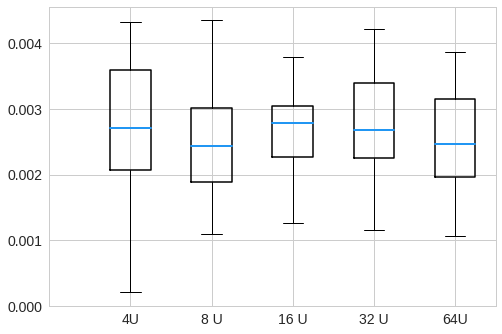

In [30]:
fig = plt.figure(1)
# Create an axes instance
ax = fig.add_subplot(111)
data_to_plot=[SGD_cov_leftEV_4U,SGD_cov_leftEV_8U,SGD_cov_leftEV_16U,SGD_cov_leftEV_32U,SGD_cov_leftEV_64U]
# Create the boxplot
bp =ax.boxplot(data_to_plot,showfliers=False)
plt.xticks(np.arange(6),('','4U','8 U','16 U','32 U','64U'),fontsize=14)
plt.setp(bp['boxes'], linewidth=1.5)
plt.setp(bp['medians'], linewidth=2,color='#2196F3')
plt.yticks(fontsize=14)

fig.savefig('SGD_cov_leftmost_1HL.pdf')

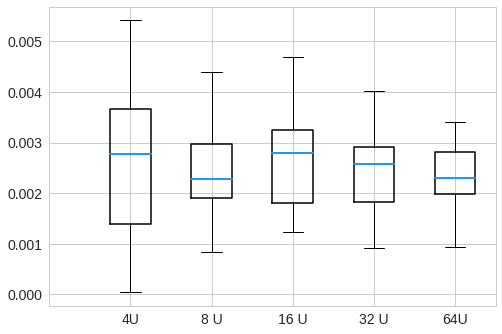

In [31]:
fig = plt.figure(1)
# Create an axes instance
ax = fig.add_subplot(111)
data_to_plot=[SGD_cov_rightEV_4U,SGD_cov_rightEV_8U,SGD_cov_rightEV_16U,SGD_cov_rightEV_32U,SGD_cov_rightEV_64U]
# Create the boxplot
bp =ax.boxplot(data_to_plot,showfliers=False)
plt.xticks(np.arange(6),('','4U','8 U','16 U','32 U','64U'),fontsize=14)
plt.setp(bp['boxes'], linewidth=1.5)
plt.setp(bp['medians'], linewidth=2,color='#2196F3')
plt.yticks(fontsize=14)

fig.savefig('SGD_cov_rightmost_1HL.pdf')

SGD ALL

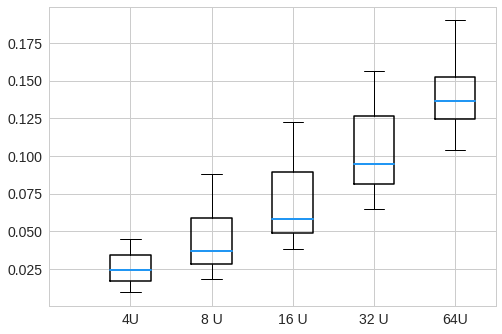

In [32]:
fig = plt.figure(1)
# Create an axes instance
ax = fig.add_subplot(111)
data_to_plot=[SGD_cov_NEG_4U_normalized,SGD_cov_NEG_8U_normalized,SGD_cov_NEG_16U_normalized,SGD_cov_NEG_32U_normalized,SGD_cov_NEG_64U_normalized]
# Create the boxplot
bp =ax.boxplot(data_to_plot,showfliers=False)
plt.xticks(np.arange(6),('','4U','8 U','16 U','32 U','64U'),fontsize=14)
plt.setp(bp['boxes'], linewidth=1.5)
plt.setp(bp['medians'], linewidth=2,color='#2196F3')
plt.yticks(fontsize=14)

fig.savefig('SGD_cov_neg_1HL.pdf')

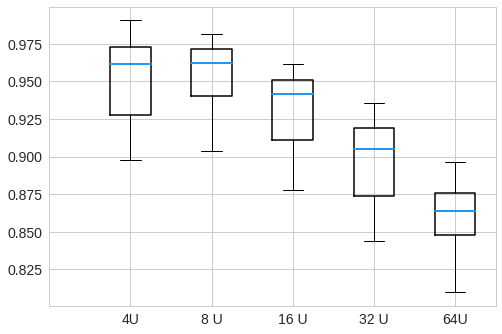

In [33]:
fig = plt.figure(1)
# Create an axes instance
ax = fig.add_subplot(111)
data_to_plot=[SGD_cov_POS_4U_normalized,SGD_cov_POS_8U_normalized,SGD_cov_POS_16U_normalized,SGD_cov_POS_32U_normalized,SGD_cov_POS_64U_normalized]
# Create the boxplot
bp =ax.boxplot(data_to_plot,showfliers=False)
plt.xticks(np.arange(6),('','4U','8 U','16 U','32 U','64U'),fontsize=14)
plt.setp(bp['boxes'], linewidth=1.5)
plt.setp(bp['medians'], linewidth=2,color='#2196F3')
plt.yticks(fontsize=14)

fig.savefig('SGD_cov_pos_1HL.pdf')

UNIFORM MINMAX

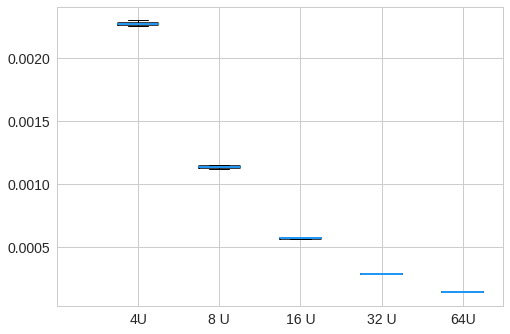

In [34]:
fig = plt.figure(1)
# Create an axes instance
ax = fig.add_subplot(111)
data_to_plot=[uniform_cov_leftEV_4U,uniform_cov_leftEV_8U,uniform_cov_leftEV_16U,uniform_cov_leftEV_32U,uniform_cov_leftEV_64U]
# Create the boxplot
bp =ax.boxplot(data_to_plot,showfliers=False)
plt.xticks(np.arange(6),('','4U','8 U','16 U','32 U','64U'),fontsize=14)
plt.setp(bp['boxes'], linewidth=1.5)
plt.setp(bp['medians'], linewidth=2,color='#2196F3')
plt.yticks(fontsize=14)

fig.savefig('uniform_cov_leftmost_1HL.pdf')

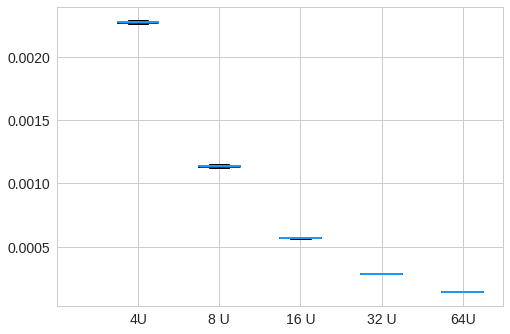

In [35]:
fig = plt.figure(1)
# Create an axes instance
ax = fig.add_subplot(111)
data_to_plot=[uniform_cov_rightEV_4U,uniform_cov_rightEV_8U,uniform_cov_rightEV_16U,uniform_cov_rightEV_32U,uniform_cov_rightEV_64U]
# Create the boxplot
bp =ax.boxplot(data_to_plot,showfliers=False)
plt.xticks(np.arange(6),('','4U','8 U','16 U','32 U','64U'),fontsize=14)
plt.setp(bp['boxes'], linewidth=1.5)
plt.setp(bp['medians'], linewidth=2,color='#2196F3')
plt.yticks(fontsize=14)

fig.savefig('uniform_cov_rightmost_1HL.pdf')

UNIFORM ALL

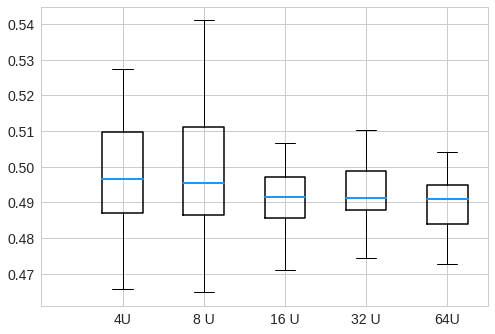

In [36]:
fig = plt.figure(1)
# Create an axes instance
ax = fig.add_subplot(111)
data_to_plot=[uniform_cov_NEG_4U_normalized,uniform_cov_NEG_8U_normalized,uniform_cov_NEG_16U_normalized,uniform_cov_NEG_32U_normalized,uniform_cov_NEG_64U_normalized]
# Create the boxplot
bp =ax.boxplot(data_to_plot,showfliers=False)
plt.xticks(np.arange(6),('','4U','8 U','16 U','32 U','64U'),fontsize=14)
plt.setp(bp['boxes'], linewidth=1.5)
plt.setp(bp['medians'], linewidth=2,color='#2196F3')
plt.yticks(fontsize=14)

fig.savefig('uniform_cov_neg_1HL.pdf')

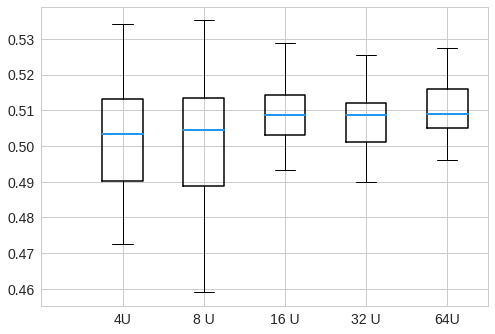

In [37]:
fig = plt.figure(1)
# Create an axes instance
ax = fig.add_subplot(111)
data_to_plot=[uniform_cov_POS_4U_normalized,uniform_cov_POS_8U_normalized,uniform_cov_POS_16U_normalized,uniform_cov_POS_32U_normalized,uniform_cov_POS_64U_normalized]
# Create the boxplot
bp =ax.boxplot(data_to_plot,showfliers=False)
plt.xticks(np.arange(6),('','4U','8 U','16 U','32 U','64U'),fontsize=14)
plt.setp(bp['boxes'], linewidth=1.5)
plt.setp(bp['medians'], linewidth=2,color='#2196F3')
plt.yticks(fontsize=14)

fig.savefig('uniform_cov_pos_1HL.pdf')

### Eigenspectrum

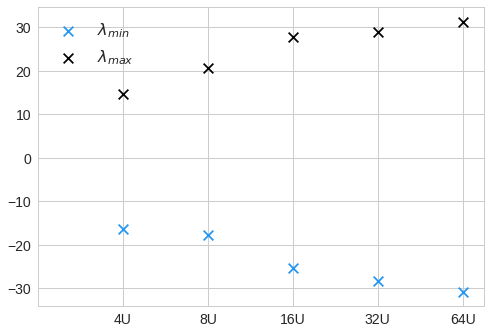

In [39]:
fig = plt.figure(6)

plt.scatter([1,2,3,4,5], [EVs_4U_min,EVs_8U_min,EVs_16U_min,EVs_32U_min,EVs_64U_min], s=95,marker='x', color='#2196F3')
plt.scatter([1,2,3,4,5],[EVs_4U_max,EVs_8U_max,EVs_16U_max,EVs_32U_max,EVs_64U_max],marker='x',color='k',s=95)
  

# plt.yscale('log') <- TODO
plt.xticks(np.arange(6),('','4U','8U','16U','32U','64U'),fontsize=14)
plt.yticks(fontsize=14)

legend=['$\lambda_{min}$','$\lambda_{max}$']
plt.legend(legend,fontsize=16)

fig.savefig('EVs_1HL.pdf')


# all in one

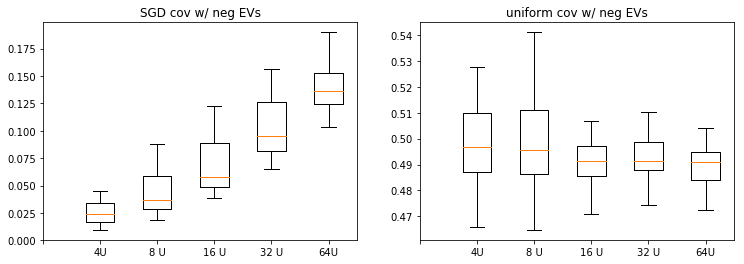

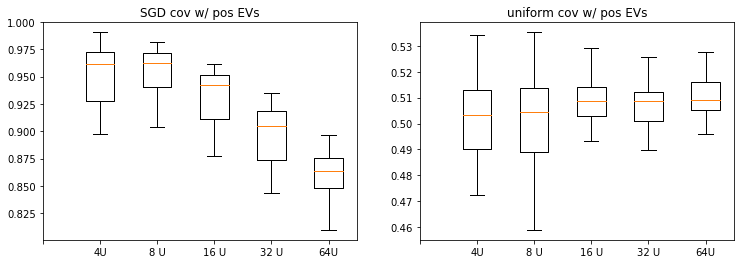

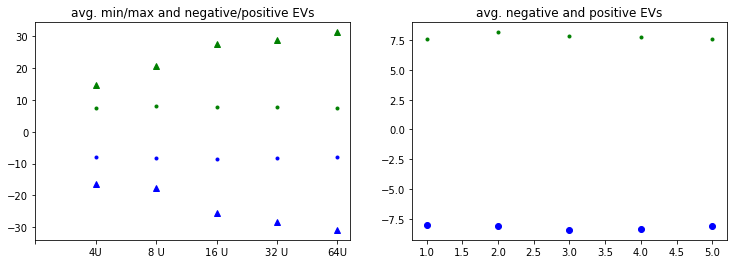

In [29]:
fig = plt.figure(7)

plt.subplot(1, 2, 1)
data_to_plot=[SGD_cov_NEG_4U_normalized,SGD_cov_NEG_8U_normalized,SGD_cov_NEG_16U_normalized,SGD_cov_NEG_32U_normalized,SGD_cov_NEG_64U_normalized]
plt.boxplot(data_to_plot,showfliers=False)
plt.title('SGD cov w/ neg EVs')
plt.xticks(np.arange(6),('','4U','8 U','16 U','32 U','64U'))

plt.subplot(1, 2, 2)
data_to_plot=[uniform_cov_NEG_4U_normalized,uniform_cov_NEG_8U_normalized,uniform_cov_NEG_16U_normalized,uniform_cov_NEG_32U_normalized,uniform_cov_NEG_64U_normalized]
plt.boxplot(data_to_plot,showfliers=False)
plt.title('uniform cov w/ neg EVs')
plt.xticks(np.arange(6),('','4U','8 U','16 U','32 U','64U'))

plt.subplots_adjust(left=5, right=6.6)

fig = plt.figure(8)

plt.subplot(1, 2, 1)
data_to_plot=[SGD_cov_POS_4U_normalized,SGD_cov_POS_8U_normalized,SGD_cov_POS_16U_normalized,SGD_cov_POS_32U_normalized,SGD_cov_POS_64U_normalized]
plt.boxplot(data_to_plot,showfliers=False)
plt.title('SGD cov w/ pos EVs')
plt.xticks(np.arange(6),('','4U','8 U','16 U','32 U','64U'))

plt.subplot(1, 2, 2)
data_to_plot=[uniform_cov_POS_4U_normalized,uniform_cov_POS_8U_normalized,uniform_cov_POS_16U_normalized,uniform_cov_POS_32U_normalized,uniform_cov_POS_64U_normalized]
plt.boxplot(data_to_plot,showfliers=False)
plt.title('uniform cov w/ pos EVs')
plt.xticks(np.arange(6),('','4U','8 U','16 U','32 U','64U'))

plt.subplots_adjust(left=5, right=6.6)
fig = plt.figure(9)

plt.subplot(1, 2, 1)

plt.plot([1,2,3,4,5], [EVs_4U_min,EVs_8U_min,EVs_16U_min,EVs_32U_min,EVs_64U_min], 'b^',[1,2,3,4,5], [EVs_4U_max,EVs_8U_max,EVs_16U_max,EVs_32U_max,EVs_64U_max], 'g^',[1,2,3,4,5], [EVs_4U_neg_avg,EVs_8U_neg_avg,EVs_16U_neg_avg,EVs_32U_neg_avg,EVs_64U_neg_avg], 'b.',[1,2,3,4,5], [EVs_4U_pos_avg,EVs_8U_pos_avg,EVs_16U_pos_avg,EVs_32U_pos_avg,EVs_64U_pos_avg], 'g.')
plt.title('avg. min/max and negative/positive EVs')
plt.xticks(np.arange(6),('','4U','8 U','16 U','32 U','64U'))

plt.subplot(1, 2, 2)
EVs_4U_neg_avg
plt.plot([1,2,3,4,5], [EVs_4U_neg_avg,EVs_8U_neg_avg,EVs_16U_neg_avg,EVs_32U_neg_avg,EVs_64U_neg_avg], 'bo',[1,2,3,4,5], [EVs_4U_pos_avg,EVs_8U_pos_avg,EVs_16U_pos_avg,EVs_32U_pos_avg,EVs_64U_pos_avg], 'g.')
plt.title('avg. negative and positive EVs')
plt.subplots_adjust(left=5, right=6.6)

#plt.show()




